In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
from scipy.stats import poisson

# Reading data

In [2]:
# Read data (pre-analyzed by ...) with Brazilian format for decimals.
dfall = pd.read_csv('suicide_br.csv', delimiter=";")

C:\Users\alber\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (113,124,135,146,157,168) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dfall

,Unnamed: 0,ano,cod_mun,pop_total,pop_0_a_4_anos,pop_5_a_14_anos,pop_15_a_24_anos,pop_25_a_34_anos,pop_35_a_44_anos,pop_45_a_54_anos,...,ESPACIAL_CLUSTER,ESPACIAL_CLU_RISCO,ESPTEMP_CLUSTER,ESPTEMP_DATA_INI,ESPTEMP_DATA_FIM,ESP_TEMP_CLU_RISCO,qtd_joinpoints,join_apc_recente,join_criterio_conservador_significativo_recente,join_tendencia_recente
0,0,1996,110001,33471,4298,8286,7034,5415,3689,2238,...,NaN,NaN,"10,0","1999,0","2009,0",Alto risco,"0,0","3,7","0,0","1,0"
1,1,1996,110002,68503,8401,16561,14629,11908,8095,4493,...,NaN,NaN,NaN,NaN,NaN,NaN,"0,0","1,9","0,0","1,0"
2,2,1996,110003,8263,942,2221,1595,1221,963,612,...,NaN,NaN,"10,0","1999,0","2009,0",Alto risco,"0,0","8,0","0,0","1,0"
3,3,1996,110004,72922,8730,17388,15255,12494,8796,4843,...,NaN,NaN,"10,0","1999,0","2009,0",Alto risco,"0,0","0,1","0,0","1,0"
4,4,1996,110005,21157,2605,5176,4169,3535,2432,1507,...,NaN,NaN,"10,0","1999,0","2009,0",Alto risco,"0,0","21,4","0,0","1,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133596,133596,2019,522200,13863,972,1850,2100,2231,2230,1922,...,"5,0",Alto risco,NaN,NaN,NaN,NaN,"0,0","-1,0","0,0","-1,0"
133597,133597,2019,522205,8743,673,1290,1340,1507,1424,1196,...,"5,0",Alto risco,NaN,NaN,NaN,NaN,"0,0","-3,4","0,0","-1,0"
133598,133598,2019,522220,6171,567,974,1063,1152,1143,640,...,"5,0",Alto risco,NaN,NaN,NaN,NaN,"0,0","-9,0","0,0","-1,0"
133599,133599,2019,522230,5821,440,769,819,875,848,871,...,"5,0",Alto risco,"10,0","1999,0","2009,0",Alto risco,"0,0","-19,4","0,0","-1,0"


In [4]:
# Read column names and types
for col in dfall.columns:
    print(col,'     of type:', dfall[col].dtypes)

Unnamed: 0      of type: int64
ano      of type: int64
cod_mun      of type: int64
pop_total      of type: int64
pop_0_a_4_anos      of type: int64
pop_5_a_14_anos      of type: int64
pop_15_a_24_anos      of type: int64
pop_25_a_34_anos      of type: int64
pop_35_a_44_anos      of type: int64
pop_45_a_54_anos      of type: int64
pop_55_a_64_anos      of type: int64
pop_65_a_74_anos      of type: int64
pop_75_anos_e_mais      of type: int64
pop_idade_ignorada      of type: int64
suic_total      of type: object
suic_0_a_4_anos      of type: object
suic_5_a_14_anos      of type: object
suic_15_a_24_anos      of type: object
suic_25_a_34_anos      of type: object
suic_35_a_44_anos      of type: object
suic_45_a_54_anos      of type: object
suic_55_a_64_anos      of type: object
suic_65_a_74_anos      of type: object
suic_75_anos_e_mais      of type: object
suic_idade_ignorada      of type: object
pop_total_masc      of type: int64
pop_0_a_4_anos_masc      of type: int64
pop_5_a_14_anos_ma

In [33]:
dfall['suicidio_observado_sexo_idade']

0           0,0
1           2,0
2           1,0
3           1,0
4           0,0
          ...  
133596      1,0
133597      0,0
133598      0,0
133599      0,0
133600    205,0
Name: suicidio_observado_sexo_idade, Length: 133601, dtype: object

## Select specific columns

In [5]:
# Select specific columns and redefine types
# taxa_experada_total = Sum_i suic_total(i) / Sum_i pop_total(i), i = cod_mun. It is computed for every year.
# suic_esp_total = pop_total * taxa_esperada_total
listcol1 = ['ano','cod_mun','MUNNOMEX','TIPO','pop_total','pop_total_masc','pop_total_fem']
listcol2 = ['LATITUDE','LONGITUDE','suic_total','suic_total_masc','suic_total_fem','taxa_esperada_total','taxa_esperada_total_masc','taxa_esperada_total_fem','suic_esp_total','suic_esp_total_masc','suic_esp_total_fem','taxa_padronizada','taxa_padronizada_masc','taxa_padronizada_fem']
dfsel=dfall[listcol1+listcol2]
for col in listcol2:
    dfsel[col] = [x.replace(',', '.') for x in dfsel[col]]
    dfsel[col] =dfsel[col].astype(float)
dfsel.dtypes

<ipython-input-5-7f7c40d586f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsel[col] = [x.replace(',', '.') for x in dfsel[col]]
<ipython-input-5-7f7c40d586f3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsel[col] =dfsel[col].astype(float)


ano                           int64
cod_mun                       int64
MUNNOMEX                     object
TIPO                         object
pop_total                     int64
pop_total_masc                int64
pop_total_fem                 int64
LATITUDE                    float64
LONGITUDE                   float64
suic_total                  float64
suic_total_masc             float64
suic_total_fem              float64
taxa_esperada_total         float64
taxa_esperada_total_masc    float64
taxa_esperada_total_fem     float64
suic_esp_total              float64
suic_esp_total_masc         float64
suic_esp_total_fem          float64
taxa_padronizada            float64
taxa_padronizada_masc       float64
taxa_padronizada_fem        float64
dtype: object

In [6]:
dfsel

,ano,cod_mun,MUNNOMEX,TIPO,pop_total,pop_total_masc,pop_total_fem,LATITUDE,LONGITUDE,suic_total,...,suic_total_fem,taxa_esperada_total,taxa_esperada_total_masc,taxa_esperada_total_fem,suic_esp_total,suic_esp_total_masc,suic_esp_total_fem,taxa_padronizada,taxa_padronizada_masc,taxa_padronizada_fem
0,1996,110001,ALTA FLORESTA D'OESTE,IntermediarioAdjacente,33471,17799,15672,-11.929,-61.996,0.0,...,0.0,0.000043,0.000069,0.000018,1.432004,1.220878,0.276331,0.000000,0.000000,0.000000
1,1996,110002,ARIQUEMES,Urbano,68503,35340,33163,-9.913,-63.041,2.0,...,0.0,0.000043,0.000069,0.000018,2.930793,2.424059,0.584735,3.394688,6.330339,0.000000
2,1996,110003,CABIXI,RuralAdjacente,8263,4392,3871,-13.492,-60.545,1.0,...,0.0,0.000043,0.000069,0.000018,0.353519,0.301258,0.068254,18.643791,32.976879,0.000000
3,1996,110004,CACOAL,Urbano,72922,37194,35728,-11.438,-61.448,1.0,...,1.0,0.000043,0.000069,0.000018,3.119853,2.551230,0.629961,1.094068,0.000000,2.174876
4,1996,110005,CEREJEIRAS,Urbano,21157,10945,10212,-13.189,-60.812,0.0,...,0.0,0.000043,0.000069,0.000018,0.905169,0.750745,0.180059,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133596,2019,522200,VIANOPOLIS,RuralAdjacente,13863,6887,6976,-16.742,-48.516,1.0,...,0.0,0.000065,0.000104,0.000027,0.896196,0.713636,0.190743,5.936524,11.799380,0.000000
133597,2019,522205,VICENTINOPOLIS,IntermediarioAdjacente,8743,4633,4110,-17.735,-49.806,0.0,...,0.0,0.000065,0.000104,0.000027,0.565205,0.480075,0.112379,0.000000,0.000000,0.000000
133598,2019,522220,VILA BOA,RuralAdjacente,6171,3549,2622,-15.038,-47.059,0.0,...,0.0,0.000065,0.000104,0.000027,0.398934,0.367750,0.071693,0.000000,0.000000,0.000000
133599,2019,522230,VILA PROPICIO,RuralAdjacente,5821,3003,2818,-15.457,-48.889,0.0,...,0.0,0.000065,0.000104,0.000027,0.376308,0.311173,0.077052,0.000000,0.000000,0.000000


In [7]:
# Study TIPO values
dfsel['TIPO'].unique()

array(['IntermediarioAdjacente', 'Urbano', 'RuralAdjacente',
       'RuralRemoto', 'IntermediarioRemoto', nan], dtype=object)

In [8]:
# Find mun codes that have TIPO = 'nan' and see how may times thay appear
lmunan = list(dfsel[dfsel['TIPO'].isna()]['cod_mun'].unique())
print(lmunan)
for code in lmunan:
    print(dfsel[dfsel['TIPO'].isna()]['cod_mun'].value_counts()[code])

[150475, 421265, 422000, 431453, 431454, 500627]
24
24
24
17
24
24


In [9]:
# How many cod_mun per year are there?
for i in range(1996,2020,1):
    dfsp=dfsel.loc[dfall['ano'] == i]
    print('There are',len(dfsp),'cod_mun in year',i)

There are 5567 cod_mun in year 1996
There are 5567 cod_mun in year 1997
There are 5567 cod_mun in year 1998
There are 5567 cod_mun in year 1999
There are 5567 cod_mun in year 2000
There are 5567 cod_mun in year 2001
There are 5567 cod_mun in year 2002
There are 5567 cod_mun in year 2003
There are 5567 cod_mun in year 2004
There are 5567 cod_mun in year 2005
There are 5567 cod_mun in year 2006
There are 5567 cod_mun in year 2007
There are 5567 cod_mun in year 2008
There are 5567 cod_mun in year 2009
There are 5567 cod_mun in year 2010
There are 5567 cod_mun in year 2011
There are 5567 cod_mun in year 2012
There are 5566 cod_mun in year 2013
There are 5566 cod_mun in year 2014
There are 5566 cod_mun in year 2015
There are 5566 cod_mun in year 2016
There are 5566 cod_mun in year 2017
There are 5566 cod_mun in year 2018
There are 5566 cod_mun in year 2019


In [10]:
# COD_MUN = 431453 appears only in the first 17 years
dfsel.loc[dfsel['cod_mun'] == 431453]

,ano,cod_mun,MUNNOMEX,TIPO,pop_total,pop_total_masc,pop_total_fem,LATITUDE,LONGITUDE,suic_total,...,suic_total_fem,taxa_esperada_total,taxa_esperada_total_masc,taxa_esperada_total_fem,suic_esp_total,suic_esp_total_masc,suic_esp_total_fem,taxa_padronizada,taxa_padronizada_masc,taxa_padronizada_fem
4922,1996,431453,PINTO BANDEIRA,NaN,0,0,0,-29.096,-51.45,0.0,...,0.0,0.000043,0.000069,0.000018,0.000000,0.000000,0.000000,0.0,0.0,0.0
10489,1997,431453,PINTO BANDEIRA,NaN,0,0,0,-29.096,-51.45,0.0,...,0.0,0.000043,0.000070,0.000018,0.000000,0.000000,0.000000,0.0,0.0,0.0
16056,1998,431453,PINTO BANDEIRA,NaN,0,0,0,-29.096,-51.45,0.0,...,0.0,0.000043,0.000069,0.000018,0.000000,0.000000,0.000000,0.0,0.0,0.0
21623,1999,431453,PINTO BANDEIRA,NaN,0,0,0,-29.096,-51.45,0.0,...,0.0,0.000040,0.000066,0.000015,0.000000,0.000000,0.000000,0.0,0.0,0.0
27190,2000,431453,PINTO BANDEIRA,NaN,0,0,0,-29.096,-51.45,0.0,...,0.0,0.000040,0.000065,0.000016,0.000000,0.000000,0.000000,0.0,0.0,0.0
32757,2001,431453,PINTO BANDEIRA,NaN,2636,1287,1349,-29.096,-51.45,0.0,...,0.0,0.000045,0.000073,0.000018,0.119073,0.094249,0.024227,0.0,0.0,0.0
38324,2002,431453,PINTO BANDEIRA,NaN,2673,1305,1368,-29.096,-51.45,0.0,...,0.0,0.000045,0.000070,0.000019,0.119068,0.091999,0.026458,0.0,0.0,0.0
43891,2003,431453,PINTO BANDEIRA,NaN,0,0,0,-29.096,-51.45,0.0,...,0.0,0.000045,0.000072,0.000018,0.000000,0.000000,0.000000,0.0,0.0,0.0
49458,2004,431453,PINTO BANDEIRA,NaN,0,0,0,-29.096,-51.45,0.0,...,0.0,0.000045,0.000072,0.000019,0.000000,0.000000,0.000000,0.0,0.0,0.0
55025,2005,431453,PINTO BANDEIRA,NaN,0,0,0,-29.096,-51.45,0.0,...,0.0,0.000047,0.000075,0.000020,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [13]:
# Remove COD_MUN 431453 for homogeneity 
dfselt=dfsel
dfselt.drop(dfselt.index[dfsel['cod_mun'] == 431453], inplace=True)

C:\Users\alber\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
dfselt

,ano,cod_mun,MUNNOMEX,TIPO,pop_total,pop_total_masc,pop_total_fem,LATITUDE,LONGITUDE,suic_total,...,suic_total_fem,taxa_esperada_total,taxa_esperada_total_masc,taxa_esperada_total_fem,suic_esp_total,suic_esp_total_masc,suic_esp_total_fem,taxa_padronizada,taxa_padronizada_masc,taxa_padronizada_fem
0,1996,110001,ALTA FLORESTA D'OESTE,IntermediarioAdjacente,33471,17799,15672,-11.929,-61.996,0.0,...,0.0,0.000043,0.000069,0.000018,1.432004,1.220878,0.276331,0.000000,0.000000,0.000000
1,1996,110002,ARIQUEMES,Urbano,68503,35340,33163,-9.913,-63.041,2.0,...,0.0,0.000043,0.000069,0.000018,2.930793,2.424059,0.584735,3.394688,6.330339,0.000000
2,1996,110003,CABIXI,RuralAdjacente,8263,4392,3871,-13.492,-60.545,1.0,...,0.0,0.000043,0.000069,0.000018,0.353519,0.301258,0.068254,18.643791,32.976879,0.000000
3,1996,110004,CACOAL,Urbano,72922,37194,35728,-11.438,-61.448,1.0,...,1.0,0.000043,0.000069,0.000018,3.119853,2.551230,0.629961,1.094068,0.000000,2.174876
4,1996,110005,CEREJEIRAS,Urbano,21157,10945,10212,-13.189,-60.812,0.0,...,0.0,0.000043,0.000069,0.000018,0.905169,0.750745,0.180059,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133596,2019,522200,VIANOPOLIS,RuralAdjacente,13863,6887,6976,-16.742,-48.516,1.0,...,0.0,0.000065,0.000104,0.000027,0.896196,0.713636,0.190743,5.936524,11.799380,0.000000
133597,2019,522205,VICENTINOPOLIS,IntermediarioAdjacente,8743,4633,4110,-17.735,-49.806,0.0,...,0.0,0.000065,0.000104,0.000027,0.565205,0.480075,0.112379,0.000000,0.000000,0.000000
133598,2019,522220,VILA BOA,RuralAdjacente,6171,3549,2622,-15.038,-47.059,0.0,...,0.0,0.000065,0.000104,0.000027,0.398934,0.367750,0.071693,0.000000,0.000000,0.000000
133599,2019,522230,VILA PROPICIO,RuralAdjacente,5821,3003,2818,-15.457,-48.889,0.0,...,0.0,0.000065,0.000104,0.000027,0.376308,0.311173,0.077052,0.000000,0.000000,0.000000


In [15]:
# Check that we have the same number of mun each year
for i in range(1996,2020,1):
    dfsp=dfselt.loc[dfall['ano'] == i]
    print(len(dfsp),i)

5566 1996
5566 1997
5566 1998
5566 1999
5566 2000
5566 2001
5566 2002
5566 2003
5566 2004
5566 2005
5566 2006
5566 2007
5566 2008
5566 2009
5566 2010
5566 2011
5566 2012
5566 2013
5566 2014
5566 2015
5566 2016
5566 2017
5566 2018
5566 2019


In [17]:
# Select one year to understand how many mun are there. 133584 entries = 5566 cod_mun x 24 years
dfselt.loc[dfselt['ano'] == 2000]

,ano,cod_mun,MUNNOMEX,TIPO,pop_total,pop_total_masc,pop_total_fem,LATITUDE,LONGITUDE,suic_total,...,suic_total_fem,taxa_esperada_total,taxa_esperada_total_masc,taxa_esperada_total_fem,suic_esp_total,suic_esp_total_masc,suic_esp_total_fem,taxa_padronizada,taxa_padronizada_masc,taxa_padronizada_fem
22268,2000,110001,ALTA FLORESTA D'OESTE,IntermediarioAdjacente,26533,13924,12609,-11.929,-61.996,2.0,...,0.0,0.00004,0.000065,0.000016,1.066482,0.904487,0.204147,9.464236,17.562564,0.000000
22269,2000,110002,ARIQUEMES,Urbano,74503,37995,36508,-9.913,-63.041,6.0,...,1.0,0.00004,0.000065,0.000016,2.994614,2.468111,0.591084,10.822384,18.616397,2.115068
22270,2000,110003,CABIXI,RuralAdjacente,7518,3962,3556,-13.492,-60.545,0.0,...,0.0,0.00004,0.000065,0.000016,0.302183,0.257367,0.057574,0.000000,0.000000,0.000000
22271,2000,110004,CACOAL,Urbano,73568,37218,36350,-11.438,-61.448,10.0,...,1.0,0.00004,0.000065,0.000016,2.957032,2.417638,0.588526,15.048544,25.951742,4.244792
22272,2000,110005,CEREJEIRAS,Urbano,18207,9317,8890,-13.189,-60.812,0.0,...,0.0,0.00004,0.000065,0.000016,0.731822,0.605221,0.143934,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27830,2000,522200,VIANOPOLIS,RuralAdjacente,11300,5766,5534,-16.742,-48.516,1.0,...,0.0,0.00004,0.000065,0.000016,0.454198,0.374553,0.089598,7.896341,15.555556,0.000000
27831,2000,522205,VICENTINOPOLIS,IntermediarioAdjacente,6015,3127,2888,-17.735,-49.806,0.0,...,0.0,0.00004,0.000065,0.000016,0.241770,0.203126,0.046758,0.000000,0.000000,0.000000
27832,2000,522220,VILA BOA,RuralAdjacente,3287,1679,1608,-15.038,-47.059,0.0,...,0.0,0.00004,0.000065,0.000016,0.132119,0.109066,0.026034,0.000000,0.000000,0.000000
27833,2000,522230,VILA PROPICIO,RuralAdjacente,4492,2368,2124,-15.457,-48.889,0.0,...,0.0,0.00004,0.000065,0.000016,0.180554,0.153823,0.034389,0.000000,0.000000,0.000000


In [18]:
dfselt.dtypes

ano                           int64
cod_mun                       int64
MUNNOMEX                     object
TIPO                         object
pop_total                     int64
pop_total_masc                int64
pop_total_fem                 int64
LATITUDE                    float64
LONGITUDE                   float64
suic_total                  float64
suic_total_masc             float64
suic_total_fem              float64
taxa_esperada_total         float64
taxa_esperada_total_masc    float64
taxa_esperada_total_fem     float64
suic_esp_total              float64
suic_esp_total_masc         float64
suic_esp_total_fem          float64
taxa_padronizada            float64
taxa_padronizada_masc       float64
taxa_padronizada_fem        float64
dtype: object

# Function for creating dataframe with average values

In [20]:
# Define function that construct dataframe with average values from year1 to year2 
def dfav(year1,year2,df):
    dlist=[]
    for year in range(year1,year2+1):
        dfb=df.loc[df['ano'] == year]
        dlist.append(dfb)
    dfr=pd.concat(dlist).reset_index(drop=True)
    dfc=dfr.groupby(['cod_mun']).sum().reset_index()
    for col in list(dfc.columns):
        if col != 'cod_mun':
            dfc[col]=dfc[col]/(year2-year1+1)
    dfc['MUNNOMEX']=list(df.loc[df['ano'] == 2000]['MUNNOMEX'])
    dfc['TIPO']=list(df.loc[df['ano'] == 2000]['TIPO'])
    first_column = dfc.pop('MUNNOMEX')
    dfc.insert(1,'MUNNOMEX',first_column)
    second_column = dfc.pop('TIPO')
    dfc.insert(2,'TIPO',second_column)
    del dfc['ano']
    return dfc

# Load shape

In [21]:
# https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html
path_shape = "BR_Municipios_2021.shp"
d_shape = gpd.read_file(path_shape)

In [22]:
# Show shape file
d_shape

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."
...,...,...,...,...,...
5567,5222005,VianÃ³polis,GO,954.115,"POLYGON ((-48.42801 -16.62789, -48.42803 -16.6..."
5568,5222054,VicentinÃ³polis,GO,733.794,"POLYGON ((-49.84740 -17.57796, -49.84719 -17.5..."
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.10998 -14.67195, -47.10994 -14.6..."
5570,5222302,Vila PropÃ­cio,GO,2181.593,"POLYGON ((-48.75572 -14.86393, -48.75502 -14.8..."


In [23]:
# Redefine cod mun by removing last digit (why this discrepancy?)
listcodesmun = [int(str(code)[:-1]) for code in list(d_shape['CD_MUN'])]
listcodesmun;
d_shaper=d_shape
d_shaper['cod_mun']=listcodesmun
first_column = d_shaper.pop('cod_mun')
d_shaper.insert(1,'cod_mun',first_column)
d_shaper

,CD_MUN,cod_mun,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,110001,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,110002,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,110003,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,110004,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,110005,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."
...,...,...,...,...,...,...
5567,5222005,522200,VianÃ³polis,GO,954.115,"POLYGON ((-48.42801 -16.62789, -48.42803 -16.6..."
5568,5222054,522205,VicentinÃ³polis,GO,733.794,"POLYGON ((-49.84740 -17.57796, -49.84719 -17.5..."
5569,5222203,522220,Vila Boa,GO,1052.593,"POLYGON ((-47.10998 -14.67195, -47.10994 -14.6..."
5570,5222302,522230,Vila PropÃ­cio,GO,2181.593,"POLYGON ((-48.75572 -14.86393, -48.75502 -14.8..."


In [113]:
# Identify the cod mun that are not present in the data
for year in range(1996,2020):
    n=0
    dft=dfav(year,year,dfselt)
    for k in range(len(listcodesmun)):
        if list(dft['cod_mun']).count(listcodesmun[k]) == 1:
            n=n+1
        if list(dft['cod_mun']).count(listcodesmun[k]) == 0:
            print(listcodesmun[k])
    print(n)
    print('')

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
510454
5566

220095
430000
430000
500390
510452
51045

In [24]:
# Drop those unused cod_mun from shape file 
listcodrop = [220095,430000,500390,510452,510454]
for code in listcodrop:
    d_shaper.drop(d_shaper.index[d_shaper['cod_mun'] == code], inplace=True)
d_shaper=d_shaper.reset_index(drop=True)

In [25]:
d_shaper

,CD_MUN,cod_mun,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,110001,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,110002,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,110003,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,110004,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,110005,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."
...,...,...,...,...,...,...
5561,5222005,522200,VianÃ³polis,GO,954.115,"POLYGON ((-48.42801 -16.62789, -48.42803 -16.6..."
5562,5222054,522205,VicentinÃ³polis,GO,733.794,"POLYGON ((-49.84740 -17.57796, -49.84719 -17.5..."
5563,5222203,522220,Vila Boa,GO,1052.593,"POLYGON ((-47.10998 -14.67195, -47.10994 -14.6..."
5564,5222302,522230,Vila PropÃ­cio,GO,2181.593,"POLYGON ((-48.75572 -14.86393, -48.75502 -14.8..."


<AxesSubplot:>

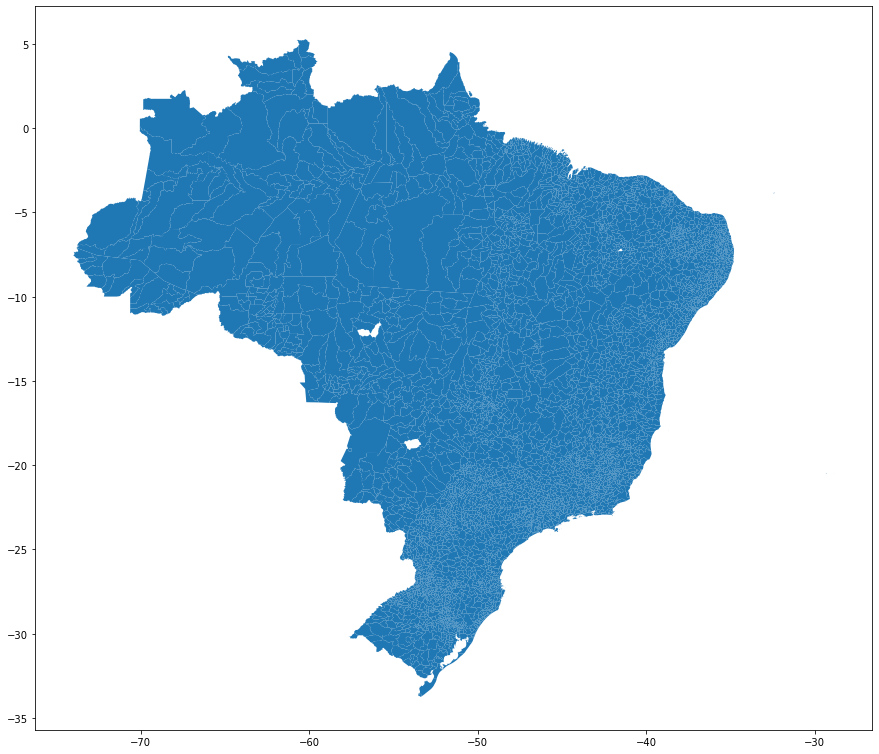

In [120]:
d_shaper.plot(figsize=(15, 15))

# Selecting data from 1996 to 2000

In [51]:
# Select data from 1996 to 2000 and remove entries with pop_tot=0
dfmy=dfav(1996,2000,dfselt)
dfmy.drop(dfmy.index[dfmy['pop_total'] == 0], inplace=True)
dfmy.reset_index(drop=True)
dfmy

,cod_mun,MUNNOMEX,TIPO,pop_total,pop_total_masc,pop_total_fem,LATITUDE,LONGITUDE,suic_total,suic_total_masc,suic_total_fem,taxa_esperada_total,taxa_esperada_total_masc,taxa_esperada_total_fem,suic_esp_total,suic_esp_total_masc,suic_esp_total_fem,taxa_padronizada,taxa_padronizada_masc,taxa_padronizada_fem
0,110001,ALTA FLORESTA D'OESTE,IntermediarioAdjacente,27132.8,14333.2,12799.6,-11.929,-61.996,1.8,1.4,0.4,0.000042,0.000068,0.000017,1.137001,0.969807,0.215450,8.214238,11.493587,4.417308
1,110002,ARIQUEMES,Urbano,72006.0,37059.4,34946.6,-9.913,-63.041,3.8,3.2,0.6,0.000042,0.000068,0.000017,3.012161,2.504766,0.585858,5.861131,9.957113,1.275632
2,110003,CABIXI,RuralAdjacente,7826.8,4151.0,3675.8,-13.492,-60.545,0.6,0.6,0.0,0.000042,0.000068,0.000017,0.327795,0.280816,0.061741,9.431732,17.291745,0.000000
3,110004,CACOAL,Urbano,73956.0,37661.0,36295.0,-11.438,-61.448,4.6,3.2,1.4,0.000042,0.000068,0.000017,3.095358,2.546545,0.608900,6.604717,9.443398,3.503198
4,110005,CEREJEIRAS,Urbano,19235.0,9895.2,9339.8,-13.189,-60.812,0.2,0.2,0.0,0.000042,0.000068,0.000017,0.805915,0.669610,0.157001,1.247956,2.402098,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,522200,VIANOPOLIS,RuralAdjacente,10036.2,5122.4,4913.8,-16.742,-48.516,0.8,0.6,0.2,0.000042,0.000068,0.000017,0.419484,0.345882,0.082334,8.151139,12.584933,3.509989
5562,522205,VICENTINOPOLIS,IntermediarioAdjacente,6147.0,3205.2,2941.8,-17.735,-49.806,0.4,0.4,0.0,0.000042,0.000068,0.000017,0.257201,0.216689,0.049311,5.886912,11.352655,0.000000
5563,522220,VILA BOA,RuralAdjacente,2742.0,1416.8,1325.2,-15.038,-47.059,0.0,0.0,0.0,0.000042,0.000068,0.000017,0.114620,0.095666,0.022230,0.000000,0.000000,0.000000
5564,522230,VILA PROPICIO,RuralAdjacente,3139.6,1671.4,1468.2,-15.457,-48.889,0.2,0.0,0.2,0.000042,0.000068,0.000017,0.130497,0.112442,0.024306,5.692308,0.000000,12.000000


In [52]:
# Computation of p-values Poisson
dfmy['p_value_total']=1-poisson.cdf(dfmy['suic_total'],dfmy['suic_esp_total']).round(8)
dfmy['p_value_total_masc']=1-poisson.cdf(dfmy['suic_total_masc'],dfmy['suic_esp_total_masc']).round(8)
dfmy['p_value_total_fem']=1-poisson.cdf(dfmy['suic_total_fem'],dfmy['suic_esp_total_fem']).round(8)

In [53]:
# Computation of Relative Risk (RR). 
# RR = (x/x_exp)(C-x_exp)/(C-x), where: x=cases, x_exp=expected cases, C=total cases.

ctt=dfmy['pop_total'].sum()
#print(ctt)
ctm=dfmy['pop_total_masc'].sum()
#print(ctm)
ctf=dfmy['pop_total_fem'].sum()
#print(ctf)

dfmy['RR_total']=((dfmy['suic_total']/(ctt-dfmy['suic_total']))/(dfmy['suic_esp_total']/(ctt-dfmy['suic_esp_total']))) 
dfmy['RR_total_masc']=(dfmy['suic_total_masc']/(ctt-dfmy['suic_total_masc']))/(dfmy['suic_esp_total_masc']/(ctt-dfmy['suic_esp_total_masc']))
dfmy['RR_total_fem']=(dfmy['suic_total_fem']/(ctt-dfmy['suic_total_fem']))/(dfmy['suic_esp_total_fem']/(ctt-dfmy['suic_esp_total_fem']))

In [55]:
# Mun with p-value <= 0.05
dfmy[dfmy['p_value_total']<=0.05]

,cod_mun,MUNNOMEX,TIPO,pop_total,pop_total_masc,pop_total_fem,LATITUDE,LONGITUDE,suic_total,suic_total_masc,...,suic_esp_total_fem,taxa_padronizada,taxa_padronizada_masc,taxa_padronizada_fem,p_value_total,p_value_total_masc,p_value_total_fem,RR_total,RR_total_masc,RR_total_fem
138,140010,BOA VISTA,Urbano,171033.4,85831.8,85201.6,2.820,-60.673,15.2,11.6,...,1.426861,9.797258,15.300205,4.215284,0.002927,0.015810,0.056801,2.127462,2.002559,2.523020
145,140040,NORMANDIA,RuralAdjacente,7182.2,3755.0,3427.2,3.881,-59.623,1.0,0.8,...,0.057862,12.576832,20.636785,3.620942,0.037283,0.224710,0.056220,3.316117,3.143188,3.456505
169,150140,BELEM,Urbano,1189113.6,562873.4,626240.2,-1.456,-48.504,64.2,43.8,...,10.498548,5.394839,8.157420,3.072686,0.021438,0.185588,0.002783,1.291051,1.151881,1.943126
346,170460,CHAPADA DE AREIA,RuralAdjacente,845.6,466.6,379.0,-10.144,-49.140,0.0,0.0,...,0.006278,0.000000,0.000000,0.000000,0.034531,0.030887,0.006259,0.000000,0.000000,0.000000
353,170625,CRIXAS DO TOCANTINS,RuralAdjacente,992.2,540.8,451.4,-11.100,-48.919,0.2,0.2,...,0.007472,11.671329,20.230303,0.000000,0.040406,0.035737,0.007444,4.849057,5.495815,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446,521190,JATAI,Urbano,74451.8,37352.4,37099.4,-17.881,-51.714,7.2,5.6,...,0.621312,10.525932,16.749122,4.324642,0.014545,0.043647,0.128968,2.312593,2.218654,2.575196
5502,521720,PIRANHAS,RuralAdjacente,11908.4,6072.0,5836.4,-16.427,-51.822,2.4,1.8,...,0.098033,24.148959,36.306625,10.171955,0.014279,0.064419,0.093381,4.813770,4.383717,6.120364
5506,521770,PONTALINA,Urbano,16517.0,8326.0,8191.0,-17.526,-49.449,2.2,1.8,...,0.137394,13.713990,23.011468,4.322598,0.033081,0.109841,0.128374,3.182812,3.197746,2.911329
5517,521890,RUBIATABA,Urbano,17499.6,8731.0,8768.6,-15.164,-49.803,3.0,1.8,...,0.147106,16.758511,20.040624,13.513126,0.006718,0.118677,0.009815,4.096988,3.049945,8.157405


In [147]:
# Mun with RR > 1
dfmy[dfmy['RR_total']>=1]

,cod_mun,MUNNOMEX,TIPO,pop_total,pop_total_masc,pop_total_fem,LATITUDE,LONGITUDE,suic_total,suic_total_masc,...,suic_esp_total_fem,taxa_padronizada,taxa_padronizada_masc,taxa_padronizada_fem,p_value_total,p_value_total_masc,p_value_total_fem,RR_total,RR_total_masc,RR_total_fem
0,110001,ALTA FLORESTA D'OESTE,IntermediarioAdjacente,27132.8,14333.2,12799.6,-11.929,-61.996,1.8,1.4,...,0.215450,8.214238,11.493587,4.417308,0.314494,0.253135,0.193821,1.583112,1.443587,1.856581
1,110002,ARIQUEMES,Urbano,72006.0,37059.4,34946.6,-9.913,-63.041,3.8,3.2,...,0.585858,5.861131,9.957113,1.275632,0.355493,0.243443,0.443372,1.261553,1.277565,1.024139
2,110003,CABIXI,RuralAdjacente,7826.8,4151.0,3675.8,-13.492,-60.545,0.6,0.6,...,0.061741,9.431732,17.291745,0.000000,0.279490,0.244833,0.059874,1.830411,2.136632,0.000000
3,110004,CACOAL,Urbano,73956.0,37661.0,36295.0,-11.438,-61.448,4.6,3.2,...,0.608900,6.604717,9.443398,3.503198,0.201006,0.252418,0.124841,1.486096,1.256605,2.299228
5,110006,COLORADO DO OESTE,IntermediarioAdjacente,23973.4,12367.8,11605.6,-13.117,-60.542,1.8,0.6,...,0.195043,8.590229,5.811294,11.485835,0.265964,0.567110,0.016720,1.791608,0.716613,6.152478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,522190,VARJAO,RuralAdjacente,3487.0,1794.4,1692.6,-17.045,-49.631,0.2,0.0,...,0.028400,5.948052,0.000000,12.605505,0.135791,0.114253,0.028001,1.370419,0.000000,7.042215
5561,522200,VIANOPOLIS,RuralAdjacente,10036.2,5122.4,4913.8,-16.742,-48.516,0.8,0.6,...,0.082334,8.151139,12.584933,3.509989,0.342614,0.292404,0.079036,1.907107,1.734693,2.429119
5562,522205,VICENTINOPOLIS,IntermediarioAdjacente,6147.0,3205.2,2941.8,-17.735,-49.806,0.4,0.4,...,0.049311,5.886912,11.352655,0.000000,0.226788,0.194820,0.048115,1.555202,1.845965,0.000000
5564,522230,VILA PROPICIO,RuralAdjacente,3139.6,1671.4,1468.2,-15.457,-48.889,0.2,0.0,...,0.024306,5.692308,0.000000,12.000000,0.122341,0.106351,0.024013,1.532606,0.000000,8.228299


# Merging with shape file

In [56]:
dfmys=d_shaper.merge(dfmy,on="cod_mun")

In [122]:
for k in range(0,5566):
    print(dfs['NM_MUN'][k],dfs['MUNNOMEX'][k]);

Alta Floresta D'Oeste ALTA FLORESTA D'OESTE
Ariquemes ARIQUEMES
Cabixi CABIXI
Cacoal CACOAL
Cerejeiras CEREJEIRAS
Colorado do Oeste COLORADO DO OESTE
Corumbiara CORUMBIARA
Costa Marques COSTA MARQUES
EspigÃ£o D'Oeste ESPIGAO D'OESTE
GuajarÃ¡-Mirim GUAJARA-MIRIM
Jaru JARU
Ji-ParanÃ¡ JI-PARANA
Machadinho D'Oeste MACHADINHO D'OESTE
Nova BrasilÃ¢ndia D'Oeste NOVA BRASILANDIA D'OESTE
Ouro Preto do Oeste OURO PRETO DO OESTE
Pimenta Bueno PIMENTA BUENO
Porto Velho PORTO VELHO
Presidente MÃ©dici PRESIDENTE MEDICI
Rio Crespo RIO CRESPO
Rolim de Moura ROLIM DE MOURA
Santa Luzia D'Oeste SANTA LUZIA D'OESTE
Vilhena VILHENA
SÃ£o Miguel do GuaporÃ© SAO MIGUEL DO GUAPORE
Nova MamorÃ© NOVA MAMORE
Alvorada D'Oeste ALVORADA D'OESTE
Alto Alegre dos Parecis ALTO ALEGRE DOS PARECIS
Alto ParaÃ­so ALTO PARAISO
Buritis BURITIS
Novo Horizonte do Oeste NOVO HORIZONTE DO OESTE
CacaulÃ¢ndia CACAULANDIA
Campo Novo de RondÃ´nia CAMPO NOVO DE RONDONIA
Candeias do Jamari CANDEIAS DO JAMARI
Castanheiras CASTANHEIRAS
C

Barro BARRO
Barroquinha BARROQUINHA
BaturitÃ© BATURITE
Beberibe BEBERIBE
Bela Cruz BELA CRUZ
Boa Viagem BOA VIAGEM
Brejo Santo BREJO SANTO
Camocim CAMOCIM
Campos Sales CAMPOS SALES
CanindÃ© CANINDE
Capistrano CAPISTRANO
Caridade CARIDADE
CarirÃ© CARIRE
CaririaÃ§u CARIRIACU
CariÃºs CARIUS
Carnaubal CARNAUBAL
Cascavel CASCAVEL
Catarina CATARINA
Catunda CATUNDA
Caucaia CAUCAIA
Cedro CEDRO
Chaval CHAVAL
ChorÃ³ CHORO
Chorozinho CHOROZINHO
CoreaÃº COREAU
CrateÃºs CRATEUS
Crato CRATO
CroatÃ¡ CROATA
Cruz CRUZ
Deputado Irapuan Pinheiro DEPUTADO IRAPUAN PINHEIRO
ErerÃ© ERERE
EusÃ©bio EUSEBIO
Farias Brito FARIAS BRITO
Forquilha FORQUILHA
Fortaleza FORTALEZA
Fortim FORTIM
Frecheirinha FRECHEIRINHA
General Sampaio GENERAL SAMPAIO
GraÃ§a GRACA
Granja GRANJA
Granjeiro GRANJEIRO
GroaÃ­ras GROAIRAS
GuaiÃºba GUAIUBA
Guaraciaba do Norte GUARACIABA DO NORTE
Guaramiranga GUARAMIRANGA
HidrolÃ¢ndia HIDROLANDIA
Horizonte HORIZONTE
Ibaretama IBARETAMA
Ibiapina IBIAPINA
Ibicuitinga IBICUITINGA
IcapuÃ­ ICAPUI
Ic

Porto de Pedras PORTO DE PEDRAS
Porto Real do ColÃ©gio PORTO REAL DO COLEGIO
Quebrangulo QUEBRANGULO
Rio Largo RIO LARGO
Roteiro ROTEIRO
Santa Luzia do Norte SANTA LUZIA DO NORTE
Santana do Ipanema SANTANA DO IPANEMA
Santana do MundaÃº SANTANA DO MUNDAU
SÃ£o BrÃ¡s SAO BRAS
SÃ£o JosÃ© da Laje SAO JOSE DA LAJE
SÃ£o JosÃ© da Tapera SAO JOSE DA TAPERA
SÃ£o LuÃ­s do Quitunde SAO LUIS DO QUITUNDE
SÃ£o Miguel dos Campos SAO MIGUEL DOS CAMPOS
SÃ£o Miguel dos Milagres SAO MIGUEL DOS MILAGRES
SÃ£o SebastiÃ£o SAO SEBASTIAO
Satuba SATUBA
Senador Rui Palmeira SENADOR RUI PALMEIRA
Tanque d'Arca TANQUE D'ARCA
Taquarana TAQUARANA
TeotÃ´nio Vilela TEOTONIO VILELA
Traipu TRAIPU
UniÃ£o dos Palmares UNIAO DOS PALMARES
ViÃ§osa VICOSA
Amparo do SÃ£o Francisco AMPARO DE SAO FRANCISCO
AquidabÃ£ AQUIDABA
Aracaju ARACAJU
ArauÃ¡ ARAUA
Areia Branca AREIA BRANCA
Barra dos Coqueiros BARRA DOS COQUEIROS
Boquim BOQUIM
Brejo Grande BREJO GRANDE
Campo do Brito CAMPO DO BRITO
Canhoba CANHOBA
CanindÃ© de SÃ£o Francisco C

Carrancas CARRANCAS
CarvalhÃ³polis CARVALHOPOLIS
Carvalhos CARVALHOS
Casa Grande CASA GRANDE
Cascalho Rico CASCALHO RICO
CÃ¡ssia CASSIA
ConceiÃ§Ã£o da Barra de Minas CONCEICAO DA BARRA DE MINAS
Cataguases CATAGUASES
Catas Altas CATAS ALTAS
Catas Altas da Noruega CATAS ALTAS DA NORUEGA
Catuji CATUJI
Catuti CATUTI
Caxambu CAXAMBU
Cedro do AbaetÃ© CEDRO DO ABAETE
Central de Minas CENTRAL DE MINAS
Centralina CENTRALINA
ChÃ¡cara CHACARA
ChalÃ© CHALE
Chapada do Norte CHAPADA DO NORTE
Chapada GaÃºcha CHAPADA GAUCHA
Chiador CHIADOR
CipotÃ¢nea CIPOTANEA
Claraval CLARAVAL
Claro dos PoÃ§Ãµes CLARO DOS POCOES
ClÃ¡udio CLAUDIO
Coimbra COIMBRA
Coluna COLUNA
Comendador Gomes COMENDADOR GOMES
Comercinho COMERCINHO
ConceiÃ§Ã£o da Aparecida CONCEICAO DA APARECIDA
ConceiÃ§Ã£o das Pedras CONCEICAO DAS PEDRAS
ConceiÃ§Ã£o das Alagoas CONCEICAO DAS ALAGOAS
ConceiÃ§Ã£o de Ipanema CONCEICAO DE IPANEMA
ConceiÃ§Ã£o do Mato Dentro CONCEICAO DO MATO DENTRO
ConceiÃ§Ã£o do ParÃ¡ CONCEICAO DO PARA
ConceiÃ§Ã£o do Rio 

Sete Lagoas SETE LAGOAS
SilveirÃ¢nia SILVEIRANIA
SilvianÃ³polis SILVIANOPOLIS
SimÃ£o Pereira SIMAO PEREIRA
SimonÃ©sia SIMONESIA
SobrÃ¡lia SOBRALIA
Soledade de Minas SOLEDADE DE MINAS
Tabuleiro TABULEIRO
Taiobeiras TAIOBEIRAS
Taparuba TAPARUBA
Tapira TAPIRA
TapiraÃ­ TAPIRAI
TaquaraÃ§u de Minas TAQUARACU DE MINAS
Tarumirim TARUMIRIM
Teixeiras TEIXEIRAS
TeÃ³filo Otoni TEOFILO OTONI
TimÃ³teo TIMOTEO
Tiradentes TIRADENTES
Tiros TIROS
Tocantins TOCANTINS
Tocos do Moji TOCOS DO MOJI
Toledo TOLEDO
Tombos TOMBOS
TrÃªs CoraÃ§Ãµes TRES CORACOES
TrÃªs Marias TRES MARIAS
TrÃªs Pontas TRES PONTAS
Tumiritinga TUMIRITINGA
Tupaciguara TUPACIGUARA
Turmalina TURMALINA
TurvolÃ¢ndia TURVOLANDIA
UbÃ¡ UBA
UbaÃ­ UBAI
Ubaporanga UBAPORANGA
Uberaba UBERABA
UberlÃ¢ndia UBERLANDIA
Umburatiba UMBURATIBA
UnaÃ­ UNAI
UniÃ£o de Minas UNIAO DE MINAS
Uruana de Minas URUANA DE MINAS
UrucÃ¢nia URUCANIA
Urucuia URUCUIA
Vargem Alegre VARGEM ALEGRE
Vargem Bonita VARGEM BONITA
Vargem Grande do Rio Pardo VARGEM GRANDE DO RIO P

Quadra QUADRA
QuatÃ¡ QUATA
Queiroz QUEIROZ
Queluz QUELUZ
Quintana QUINTANA
Rafard RAFARD
Rancharia RANCHARIA
RedenÃ§Ã£o da Serra REDENCAO DA SERRA
Regente FeijÃ³ REGENTE FEIJO
ReginÃ³polis REGINOPOLIS
Registro REGISTRO
Restinga RESTINGA
Ribeira RIBEIRA
RibeirÃ£o Bonito RIBEIRAO BONITO
RibeirÃ£o Branco RIBEIRAO BRANCO
RibeirÃ£o Corrente RIBEIRAO CORRENTE
RibeirÃ£o do Sul RIBEIRAO DO SUL
RibeirÃ£o dos Ãndios RIBEIRAO DOS INDIOS
RibeirÃ£o Grande RIBEIRAO GRANDE
RibeirÃ£o Pires RIBEIRAO PIRES
RibeirÃ£o Preto RIBEIRAO PRETO
Riversul RIVERSUL
Rifaina RIFAINA
RincÃ£o RINCAO
RinÃ³polis RINOPOLIS
Rio Claro RIO CLARO
Rio das Pedras RIO DAS PEDRAS
Rio Grande da Serra RIO GRANDE DA SERRA
RiolÃ¢ndia RIOLANDIA
Rosana ROSANA
Roseira ROSEIRA
RubiÃ¡cea RUBIACEA
RubinÃ©ia RUBINEIA
Sabino SABINO
Sagres SAGRES
Sales SALES
Sales Oliveira SALES OLIVEIRA
SalesÃ³polis SALESOPOLIS
SalmourÃ£o SALMOURAO
Saltinho SALTINHO
Salto SALTO
Salto de Pirapora SALTO DE PIRAPORA
Salto Grande SALTO GRANDE
Sandovalina SANDO

MaratÃ¡ MARATA
Marau MARAU
Marcelino Ramos MARCELINO RAMOS
Mariana Pimentel MARIANA PIMENTEL
Mariano Moro MARIANO MORO
Marques de Souza MARQUES DE SOUZA
Mata MATA
Mato Castelhano MATO CASTELHANO
Mato LeitÃ£o MATO LEITAO
Mato Queimado MATO QUEIMADO
Maximiliano de Almeida MAXIMILIANO DE ALMEIDA
Minas do LeÃ£o MINAS DO LEAO
MiraguaÃ­ MIRAGUAI
Montauri MONTAURI
Monte Alegre dos Campos MONTE ALEGRE DOS CAMPOS
Monte Belo do Sul MONTE BELO DO SUL
Montenegro MONTENEGRO
MormaÃ§o MORMACO
Morrinhos do Sul MORRINHOS DO SUL
Morro Redondo MORRO REDONDO
Morro Reuter MORRO REUTER
Mostardas MOSTARDAS
MuÃ§um MUCUM
Muitos CapÃµes MUITOS CAPOES
Muliterno MULITERNO
NÃ£o-Me-Toque NAO-ME-TOQUE
Nicolau Vergueiro NICOLAU VERGUEIRO
Nonoai NONOAI
Nova Alvorada NOVA ALVORADA
Nova AraÃ§Ã¡ NOVA ARACA
Nova Bassano NOVA BASSANO
Nova Boa Vista NOVA BOA VISTA
Nova BrÃ©scia NOVA BRESCIA
Nova CandelÃ¡ria NOVA CANDELARIA
Nova EsperanÃ§a do Sul NOVA ESPERANCA DO SUL
Nova Hartz NOVA HARTZ
Nova PÃ¡dua NOVA PADUA
Nova Palma N

In [58]:
dfs['CD_MUN']=dfs['cod_mun']
dfs['NM_MUN']=dfs['MUNNOMEX']
del dfs['cod_mun']
del dfs['MUNNOMEX']
dfs

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry,TIPO,pop_total,pop_total_masc,pop_total_fem,LATITUDE,...,suic_esp_total_fem,taxa_padronizada,taxa_padronizada_masc,taxa_padronizada_fem,p_value_total,p_value_total_masc,p_value_total_fem,RR_total,RR_total_masc,RR_total_fem
0,110001,ALTA FLORESTA D'OESTE,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...",IntermediarioAdjacente,27132.8,14333.2,12799.6,-11.929,...,0.215450,8.214238,11.493587,4.417308,0.314494,0.253135,0.193821,1.583112,1.443587,1.856581
1,110002,ARIQUEMES,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...",Urbano,72006.0,37059.4,34946.6,-9.913,...,0.585858,5.861131,9.957113,1.275632,0.355493,0.243443,0.443372,1.261553,1.277565,1.024139
2,110003,CABIXI,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...",RuralAdjacente,7826.8,4151.0,3675.8,-13.492,...,0.061741,9.431732,17.291745,0.000000,0.279490,0.244833,0.059874,1.830411,2.136632,0.000000
3,110004,CACOAL,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...",Urbano,73956.0,37661.0,36295.0,-11.438,...,0.608900,6.604717,9.443398,3.503198,0.201006,0.252418,0.124841,1.486096,1.256605,2.299228
4,110005,CEREJEIRAS,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...",Urbano,19235.0,9895.2,9339.8,-13.189,...,0.157001,1.247956,2.402098,0.000000,0.553321,0.488092,0.145297,0.248165,0.298681,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,522200,VIANOPOLIS,GO,954.115,"POLYGON ((-48.42801 -16.62789, -48.42803 -16.6...",RuralAdjacente,10036.2,5122.4,4913.8,-16.742,...,0.082334,8.151139,12.584933,3.509989,0.342614,0.292404,0.079036,1.907107,1.734693,2.429119
5562,522205,VICENTINOPOLIS,GO,733.794,"POLYGON ((-49.84740 -17.57796, -49.84719 -17.5...",IntermediarioAdjacente,6147.0,3205.2,2941.8,-17.735,...,0.049311,5.886912,11.352655,0.000000,0.226788,0.194820,0.048115,1.555202,1.845965,0.000000
5563,522220,VILA BOA,GO,1052.593,"POLYGON ((-47.10998 -14.67195, -47.10994 -14.6...",RuralAdjacente,2742.0,1416.8,1325.2,-15.038,...,0.022230,0.000000,0.000000,0.000000,0.108295,0.091232,0.021985,0.000000,0.000000,0.000000
5564,522230,VILA PROPICIO,GO,2181.593,"POLYGON ((-48.75572 -14.86393, -48.75502 -14.8...",RuralAdjacente,3139.6,1671.4,1468.2,-15.457,...,0.024306,5.692308,0.000000,12.000000,0.122341,0.106351,0.024013,1.532606,0.000000,8.228299


In [151]:
# View total cases 
dfs['suic_total']

0        1.8
1        3.8
2        0.6
3        4.6
4        0.2
        ... 
5561     0.8
5562     0.4
5563     0.0
5564     0.2
5565    97.2
Name: suic_total, Length: 5566, dtype: float64

# Plotting

array([[<AxesSubplot:title={'center':'suic_total'}>]], dtype=object)

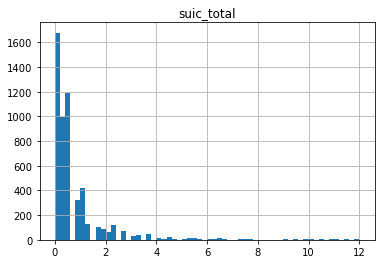

In [92]:
# Distribution of cases
dfs.hist(column='suic_total',range=[0, 12],bins=60)

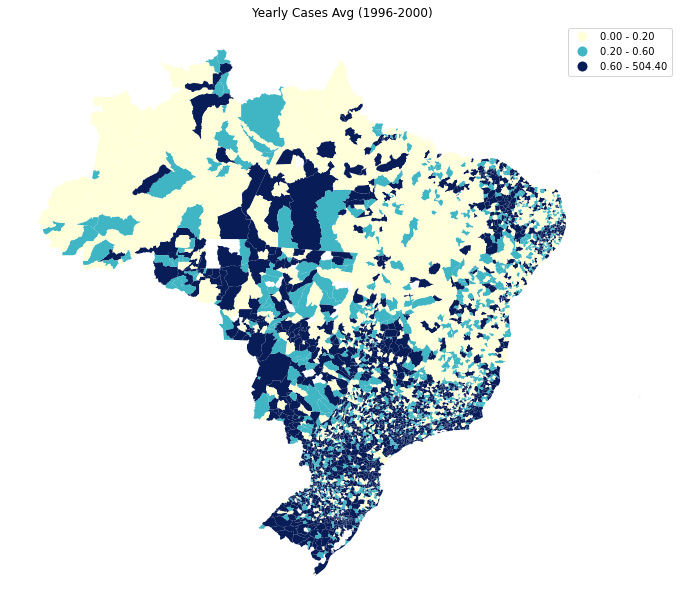

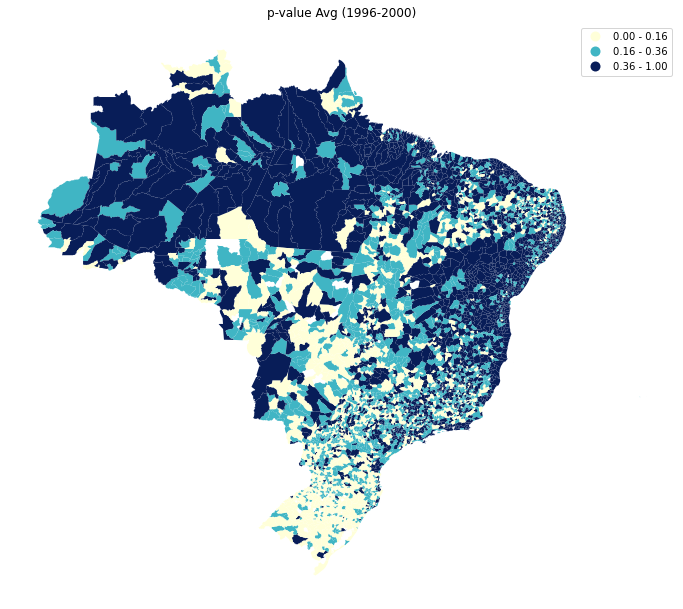

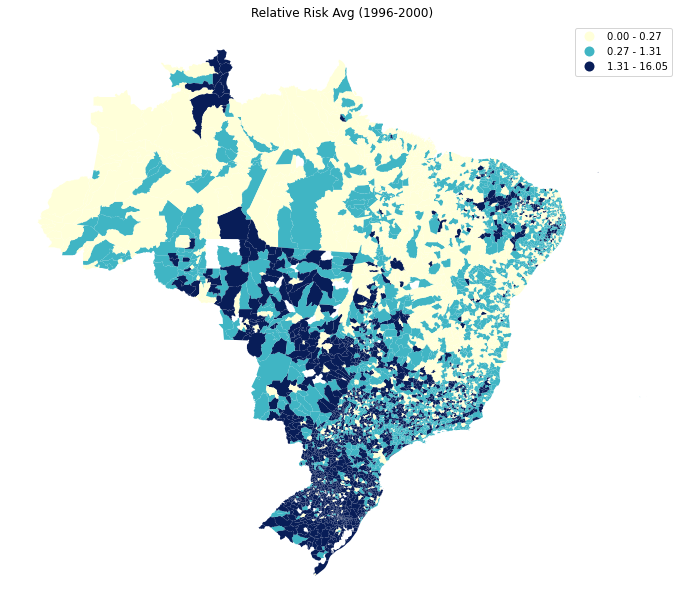

In [97]:
# Plotting Cases, p-values and RR. k=3 quantiles ranges.
cluster_variables = ['suic_total','p_value_total','RR_total']
titles=['Yearly Cases Avg (1996-2000)','p-value Avg (1996-2000)','Relative Risk Avg (1996-2000)']

# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):

    f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
    # Make the axes accessible with single indexing
    axs = np.array(axs)
    axs = axs.flatten()
    # select the axis where the map will go
    ax = axs[0]
    # Plot the map
    dfmys.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        k=3,
        linewidth=0,
        cmap="YlGnBu",
        legend=True
    )
    ax.get_legend()#.set_bbox_to_anchor((1.5, 1))
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(titles[i])
    # Display the figure
    plt.show()